In [1]:
#!/usr/bin/env python3
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from model import *
from visual_functions import *
from sweep_configs import *
from wandb.keras import WandbCallback
from create_data import *
from train import *
%matplotlib inline

## ---------------------- load data ----------------------------------------
ins, os, hpr, rn = (72,32,1), 15, (10, 20), 0.05
gen = DataGen(ins, os, hpr, rn)
X, y, z = gen.create_datasets(100)

Welcome to JupyROOT 6.26/04


/home/robin/.local/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 130.98it/s]


## Toymodel with new dimensions (72x32)

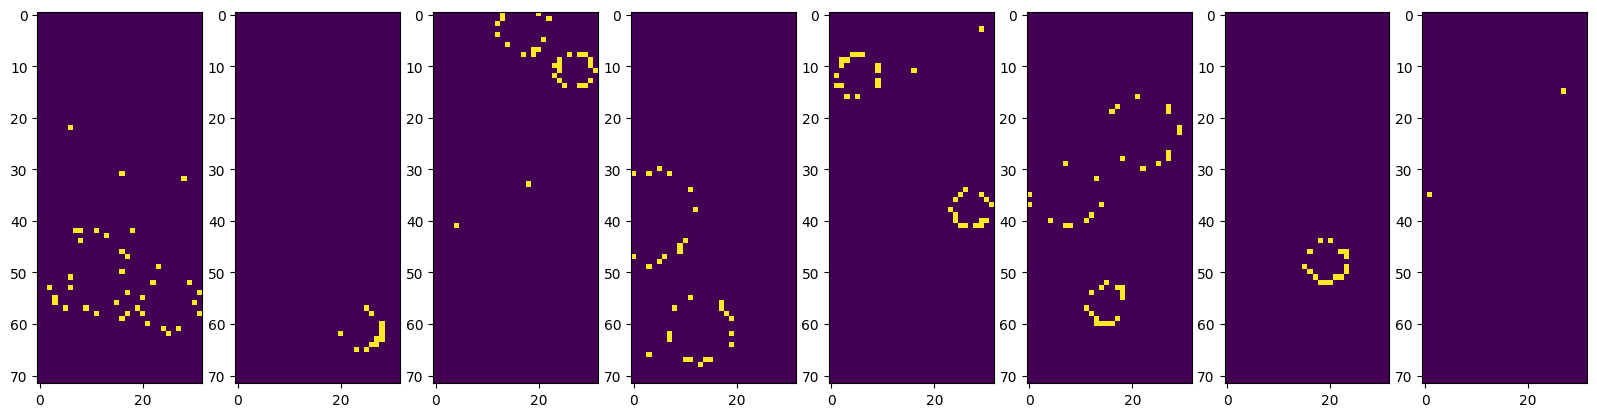

In [2]:
display_images(1, 8, X, 1)

## Real/Sim data (mcbm)

load data from  ../data/features.csv  -> 1000  events loaded


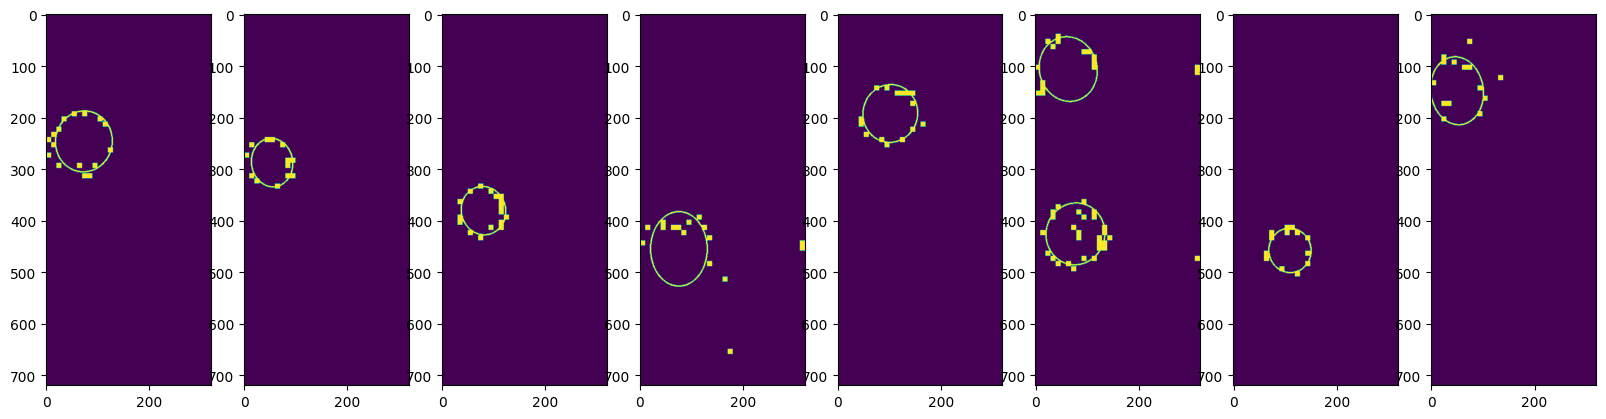

2022-06-20 11:26:44.208989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 11:26:44.243725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 11:26:44.243997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 11:26:44.244604: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
#hits_true = np.array(loadFeatures("../data/features.csv"))
#display_images(1, 8, hits_true, 1)

sim_x = np.array(loadFeatures("../data/features.csv"))
#sim_x = np.array([cv2.merge((a,a,a)) for a in sim_x])
ideal_hough_y = loadParameters("../data/targets.csv")

sim_x, ideal_hough_y = filter_events(sim_x, ideal_hough_y) # filter events with incorrectly fitted rings
hough = np.array([plot_single_event(sim_x[i], ideal_hough_y[i]) for  i in range(sim_x.shape[0])])
display_images(1,8, hough, 1)

## Best model so far

7/7 [==============================] - 2s 47ms/step


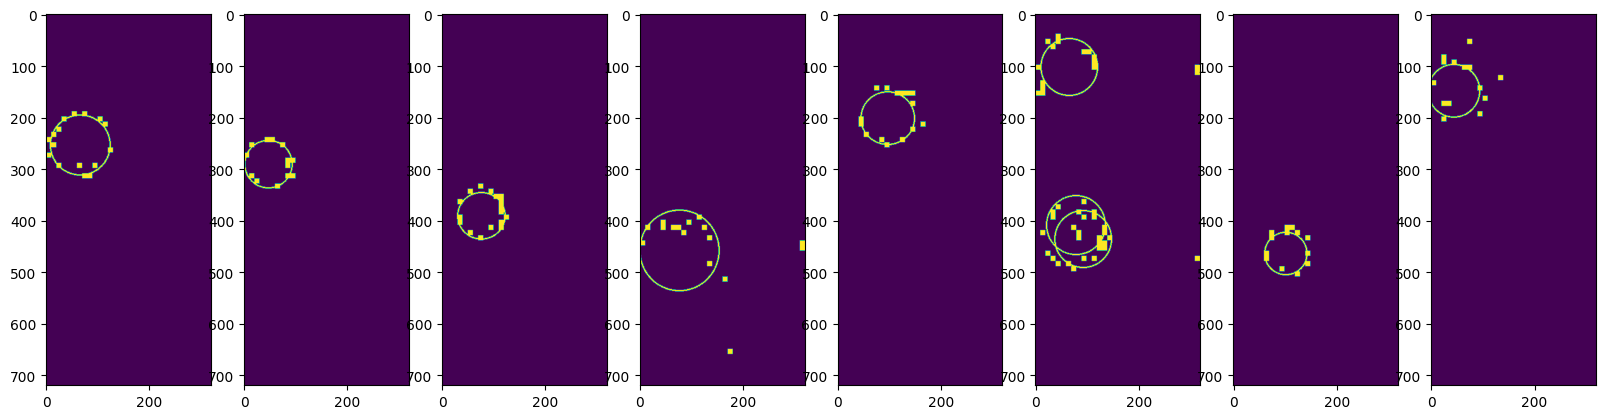

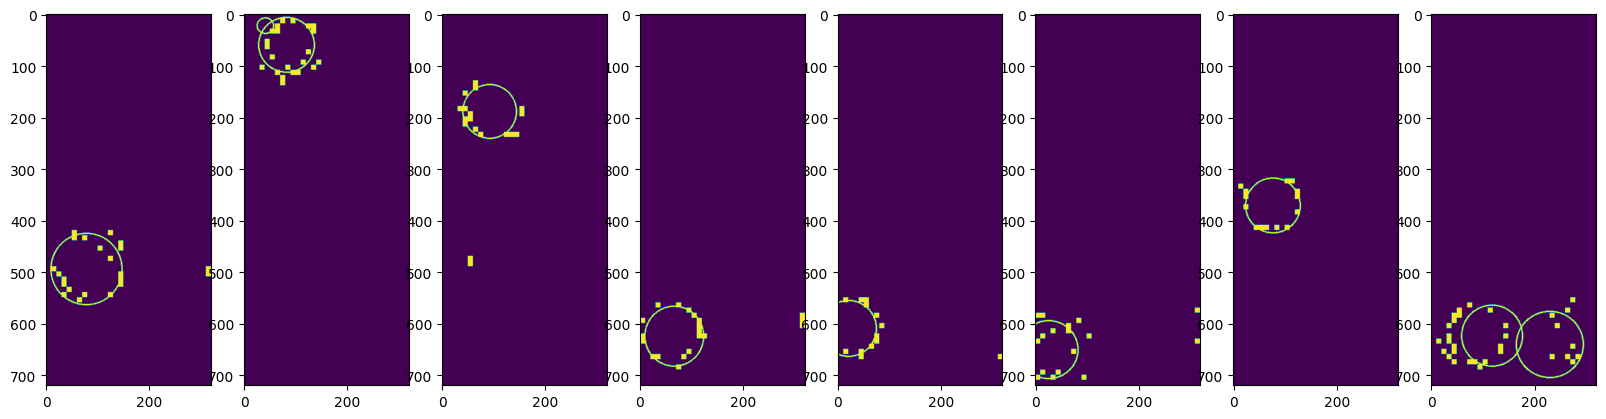

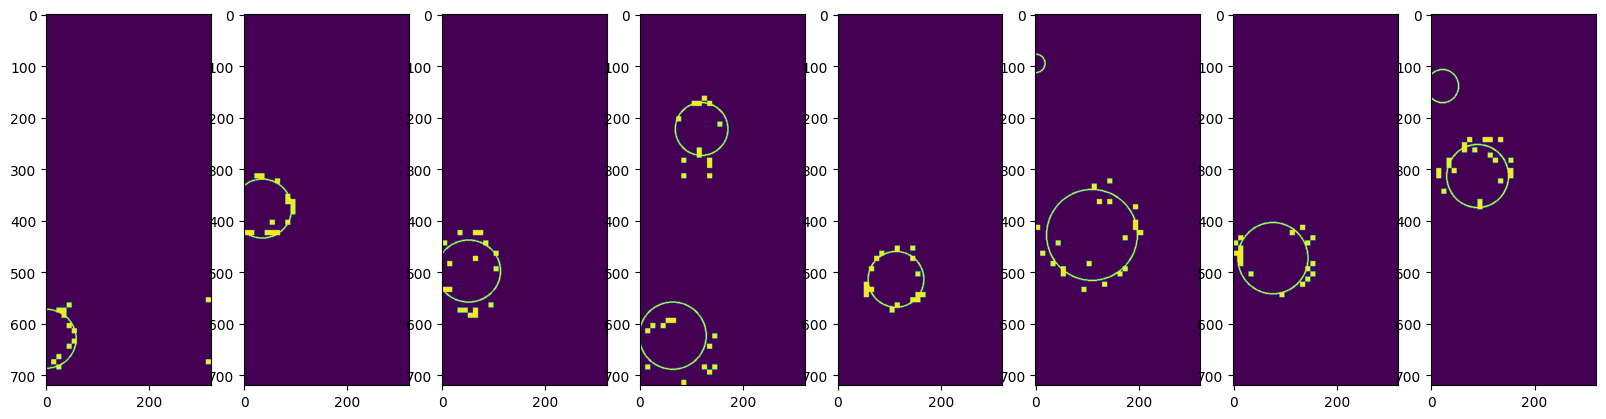

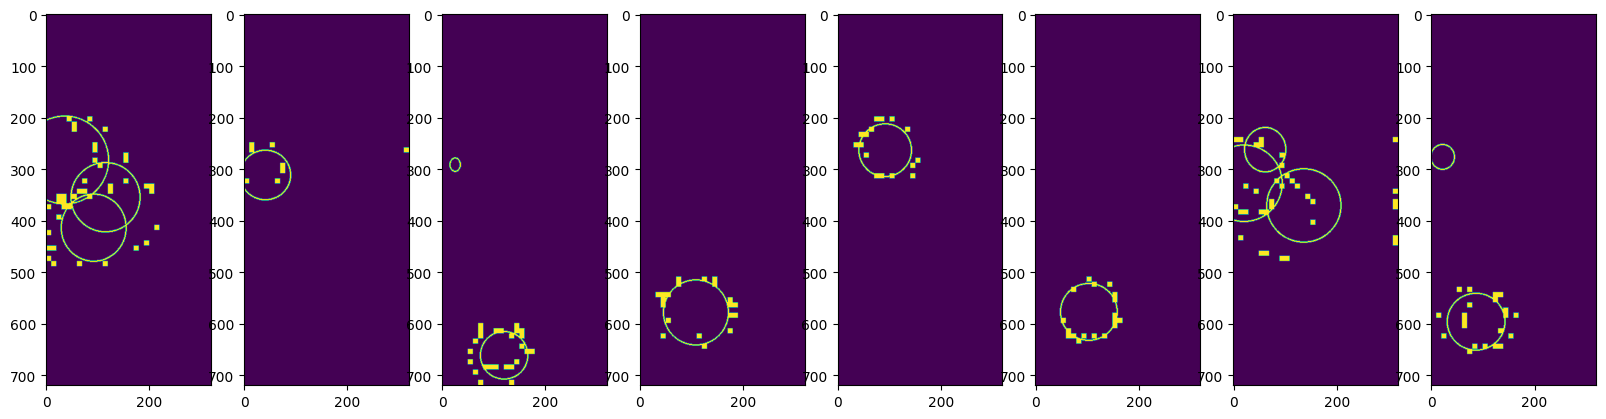

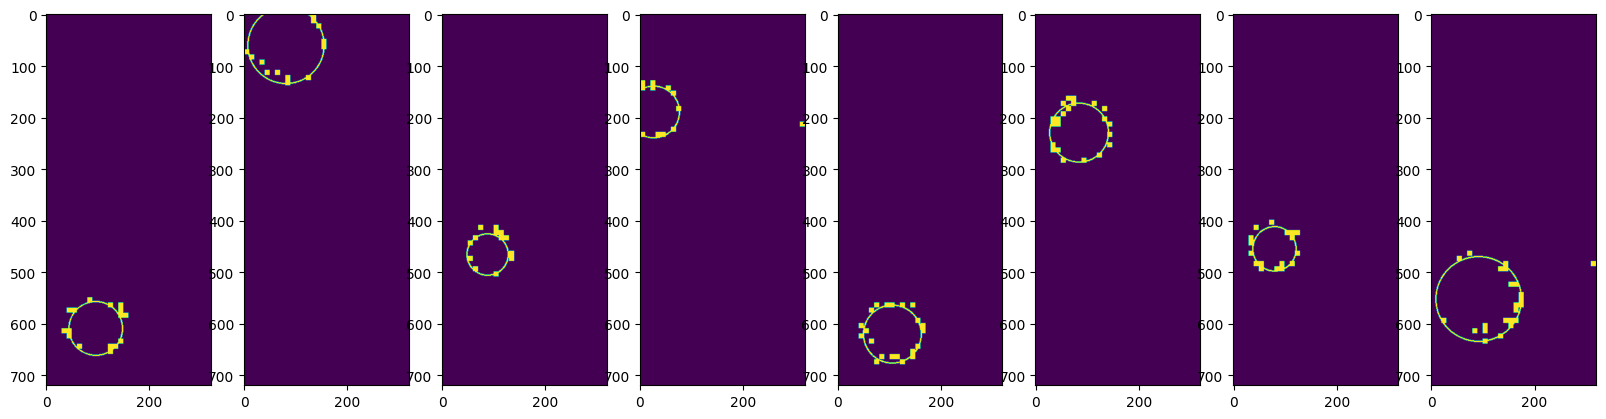

4/4 [==============================] - 0s 81ms/step
Time for predicting 100 events: 0.28520870208740234 (0.0028520870208740235s/event)


2022-06-20 11:26:47.595732: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


In [4]:
#model = tf.keras.models.load_model("../models/bmsf2.model")
#model = tf.keras.models.load_model("../models/checkpoints/generator-202206011001.model")
model = tf.keras.models.load_model("../models/checkpoints/100k-202206201105.model")
#model.summary()

#model.evaluate(X, y)

#for i in range(20):
#    show_predict(np.array(hits_true[:200]), model, i)
#    show_predict(X, model, i)
pred = model.predict(sim_x)

predictions = np.array([plot_single_event(sim_x[i], pred[i]) for  i in range(sim_x.shape[0])])
display_images(1, 8, predictions, 5)

from time import time
t1 = time()
model.predict(X)
tfp = time() - t1
print("Time for predicting {} events: {} ({}s/event)".format(X.shape[0], tfp, tfp/X.shape[0]))